In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

#Overview of the dataset
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   median_income       20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   latitude            20640 non-null  float64
 8   longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
## distribution of each numeric colum

In [ ]:
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

### plotting utility

In [ ]:
## plotting utility

import matplotlib.pyplot as plt
import numpy as np
from math import ceil

##
## type= {boxplot, kdeplot}
##
def plot_distributions(data, columns, type='boxplot', title=None):

    print("plotting columns {c}".format(c=list(columns)))

    if type not in {'boxplot', 'dkeplot'}:
        print("type= {boxplot, dkeplot} only are supported")
        return

    ## grid size depends on number of columns
    ## max 4 columns in the grid
    maxCols  = 4

    if len(columns) < 4:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 4)

    print("grid is {0}x{1}".format(numRows, numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5*numCols)
    fig.set_figheight(3*numCols)
    fig.tight_layout(pad=5.0)

    print(axs)

#         handle special axes
    if numRows == 1 and numCols == 1:
        c = columns[0]
        # axes is a scalar
        if type == 'boxplot':
            sns.boxplot(data=data, x=c, ax=axs)
        else:
            sns.kdeplot(data=data, x=c, ax=axs)
        axs.set_title(c)

    elif numRows == 1:
        i = 0
        # axes is a 1D array
        for c in columns:
#         print("column {c}".format(c=c))
            if type == 'boxplot':
                sns.boxplot(data=data, x=c, ax=axs[i])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i])
            axs[i].set_title(c)
            i = i+1

    else:
    # general case of a 2D grid
        i=j=0
        for c in columns:
            print("column {c}".format(c=c))
            if type == 'boxplot':
                print("plotting on axes [{0},{1}]".format(i,j))
                sns.boxplot(data=data, x=c, ax=axs[i,j])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i,j])

            axs[i,j].set_title(c)
            j = j+1
            if j == 4:
                i = i+1
                j= 0


### Descriptive analytics: start by looking at raw statistics for the features in this dataset. what sort of story are they telling?

feel free to use the plot utility defined above

In [ ]:
# Display descriptive statistics
descriptive_stats = houses.describe()
print(descriptive_stats)

       median_house_value  median_income  housing_median_age   total_rooms  \
count        20640.000000   20640.000000        20640.000000  20640.000000   
mean        206855.816909       3.870671           28.639486   2635.763081   
std         115395.615874       1.899822           12.585558   2181.615252   
min          14999.000000       0.499900            1.000000      2.000000   
25%         119600.000000       2.563400           18.000000   1447.750000   
50%         179700.000000       3.534800           29.000000   2127.000000   
75%         264725.000000       4.743250           37.000000   3148.000000   
max         500001.000000      15.000100           52.000000  39320.000000   

       total_bedrooms    population    households      latitude     longitude  
count    20640.000000  20640.000000  20640.000000  20640.000000  20640.000000  
mean       537.898014   1425.476744    499.539680     35.631861   -119.569704  
std        421.247906   1132.462122    382.329753      2.

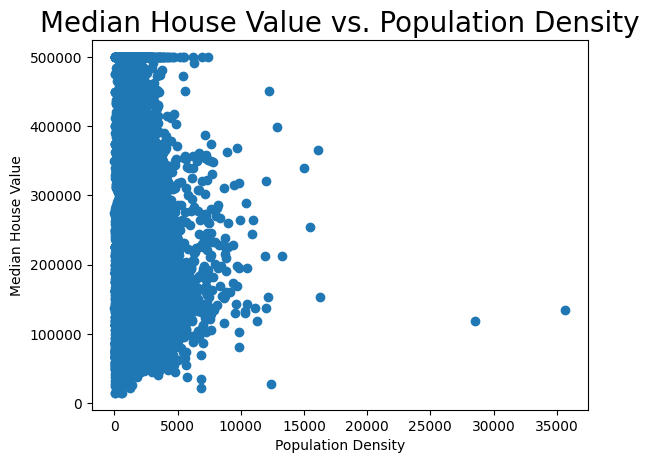

In [ ]:
# Scatter plot of median house value vs. population
plt.scatter(houses["population"], houses["median_house_value"])
plt.title("Median House Value vs. Population Density", size=20)
plt.xlabel("Population Density")
plt.ylabel("Median House Value")
plt.show()



The above plot indicates that there is no clear or strong linear relationship between the two variables. Most of the data points are clustered at the lower end of population density, suggesting that the majority of the blocks have a lower population density, with house values spread across a wide range.

Text(0.5, 1.0, 'Distribution of Households - Geographically')

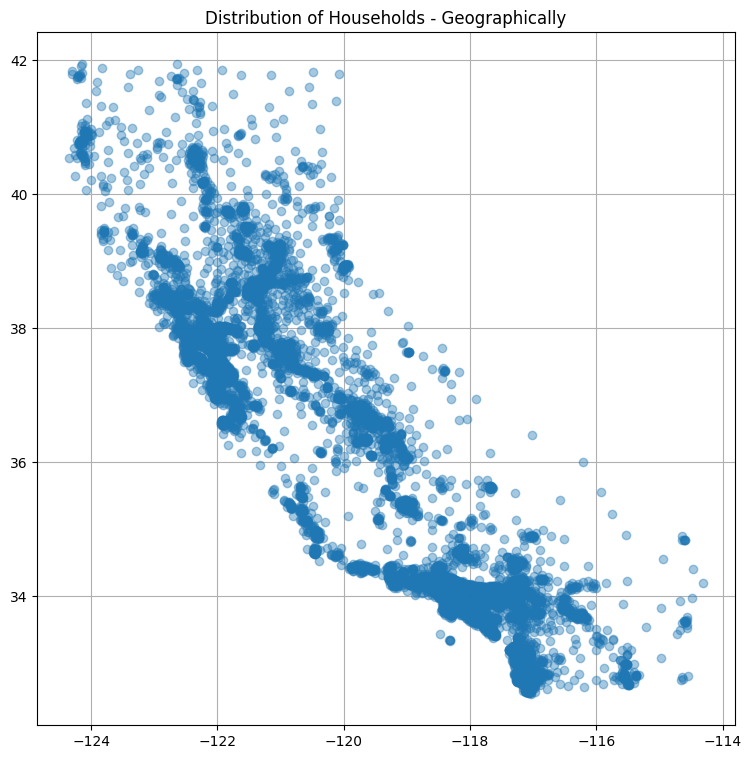

In [ ]:
plt.figure(figsize=(9,9))
plt.scatter(houses["longitude"], houses["latitude"], alpha=0.4, zorder=10)

plt.grid()
plt.title("Distribution of Households - Geographically")

Here, it can be seen that there are two parts where the value of houses are high, these majorly consist of metro cities of California(i.e. San Francisco and Los Angeles). This shows that location is an important factor as well in determining the value of the houses.

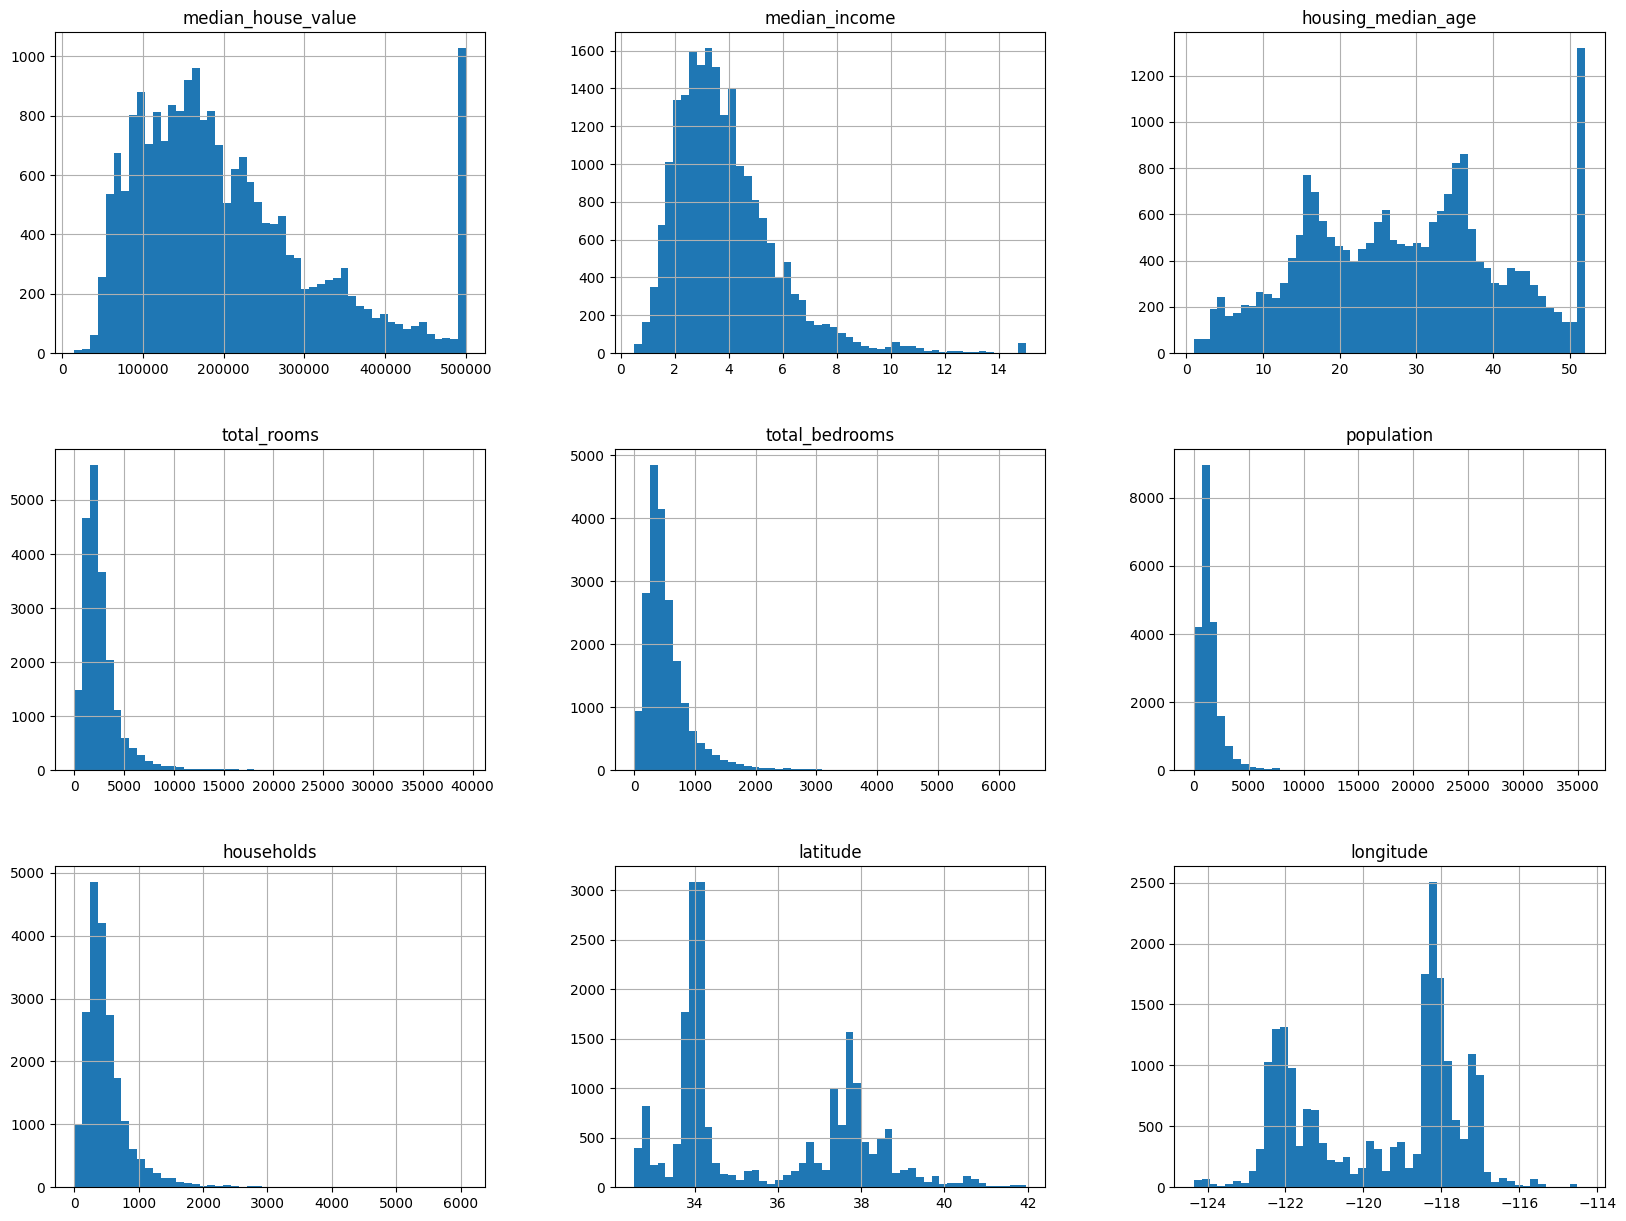

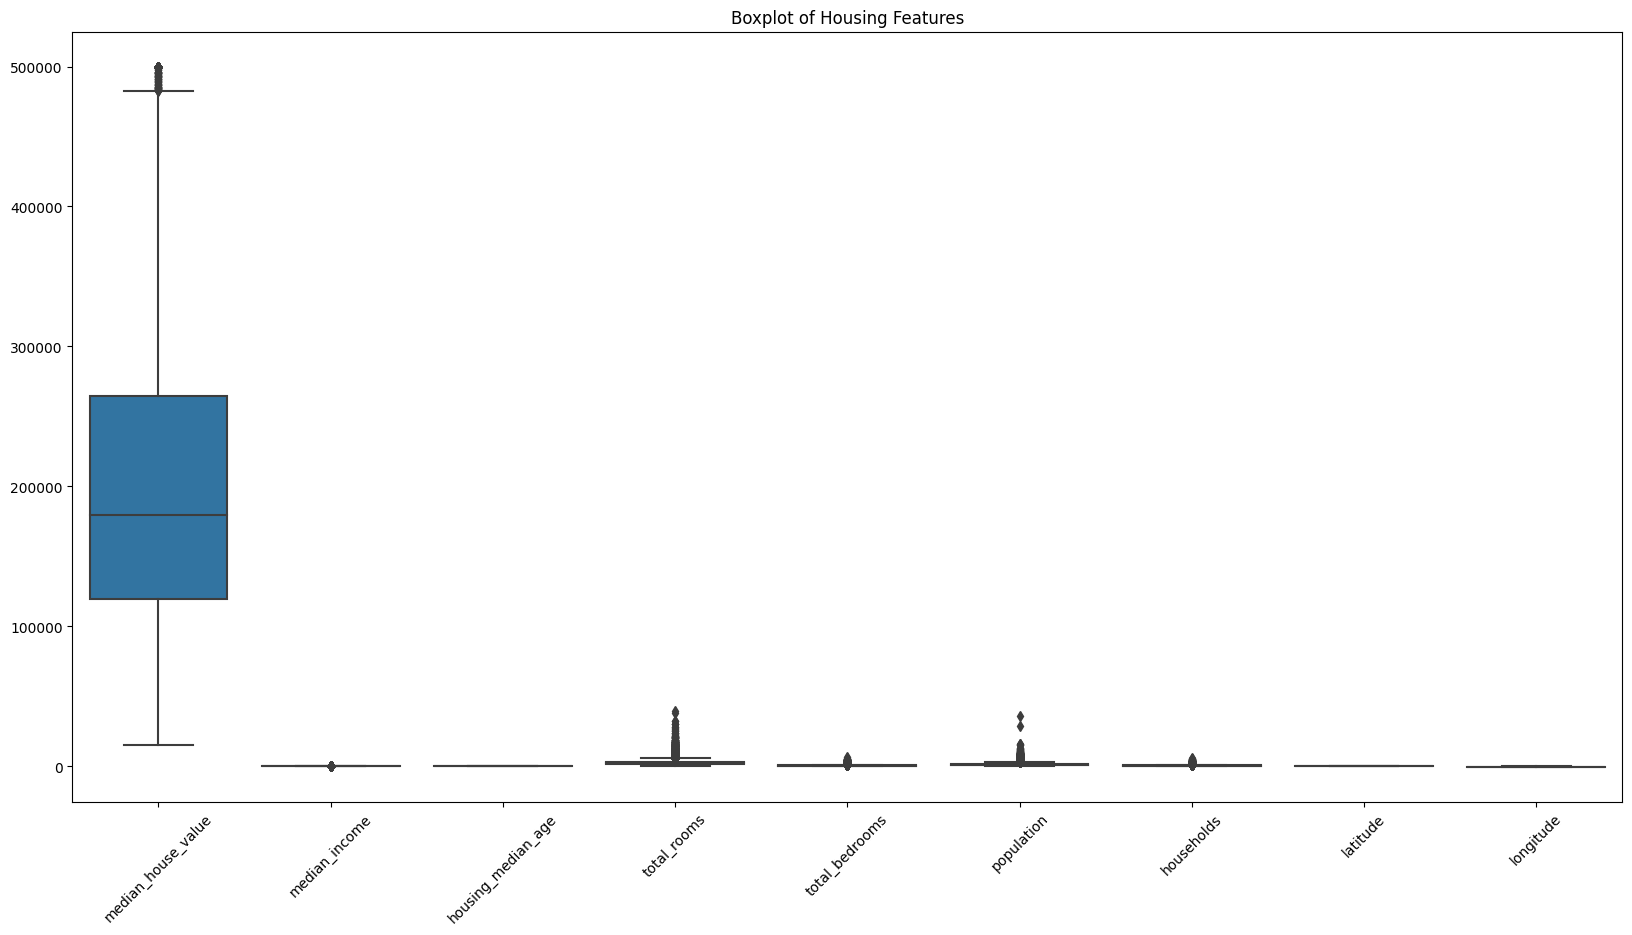

In [ ]:
# Histograms for each feature
houses.hist(bins=50, figsize=(20,15))
plt.show()

# Box plots for each feature
plt.figure(figsize=(20, 10))
sns.boxplot(data=houses)
plt.xticks(rotation=45)
plt.title('Boxplot of Housing Features')
plt.show()


Part 1:
The histograms reveal varied distributions across housing features. The median house value and total rooms show right-skewed distributions, indicating a concentration of lower values with fewer high-value houses and large properties. Median income appears normally distributed, suggesting an even spread around a central value. Population is also right-skewed, with fewer densely populated areas. The housing median age is bimodal, indicating two common ages for houses. Latitude and longitude histograms display clusters, reflecting concentrated geographic areas within California.


Part 2:
The boxplot illustrates that the median house value has a wide interquartile range and numerous outliers, indicating a varied and skewed housing market in California. Other features like income, age, rooms, and population exhibit tighter distributions with fewer outliers, suggesting more uniformity in these aspects across the dataset. The scale disparity between house values and other features makes it challenging to visually compare their distributions directly.

In [ ]:
correlation_matrix = houses.corr()
print(correlation_matrix)

                    median_house_value  median_income  housing_median_age  \
median_house_value            1.000000       0.688075            0.105623   
median_income                 0.688075       1.000000           -0.119034   
housing_median_age            0.105623      -0.119034            1.000000   
total_rooms                   0.134153       0.198050           -0.361262   
total_bedrooms                0.050594      -0.008093           -0.320485   
population                   -0.024650       0.004834           -0.296244   
households                    0.065843       0.013033           -0.302916   
latitude                     -0.144160      -0.079809            0.011173   
longitude                    -0.045967      -0.015176           -0.108197   

                    total_rooms  total_bedrooms  population  households  \
median_house_value     0.134153        0.050594   -0.024650    0.065843   
median_income          0.198050       -0.008093    0.004834    0.013033   
hous

The matrix provided is a correlation matrix of various housing-related features. It shows how each pair of variables is related. For instance, 'median_house_value' has a strong positive correlation with 'median_income' (0.688), suggesting that higher income is associated with more expensive houses. There's a notable high positive correlation between 'total_rooms' and 'total_bedrooms' (0.929), 'total_rooms' and 'households' (0.918), as well as 'total_bedrooms' and 'households' (0.978), indicating that larger houses or more populated areas have more rooms and bedrooms. The negative correlation between 'latitude' and 'longitude' (-0.924) might reflect a geographic pattern specific to California.

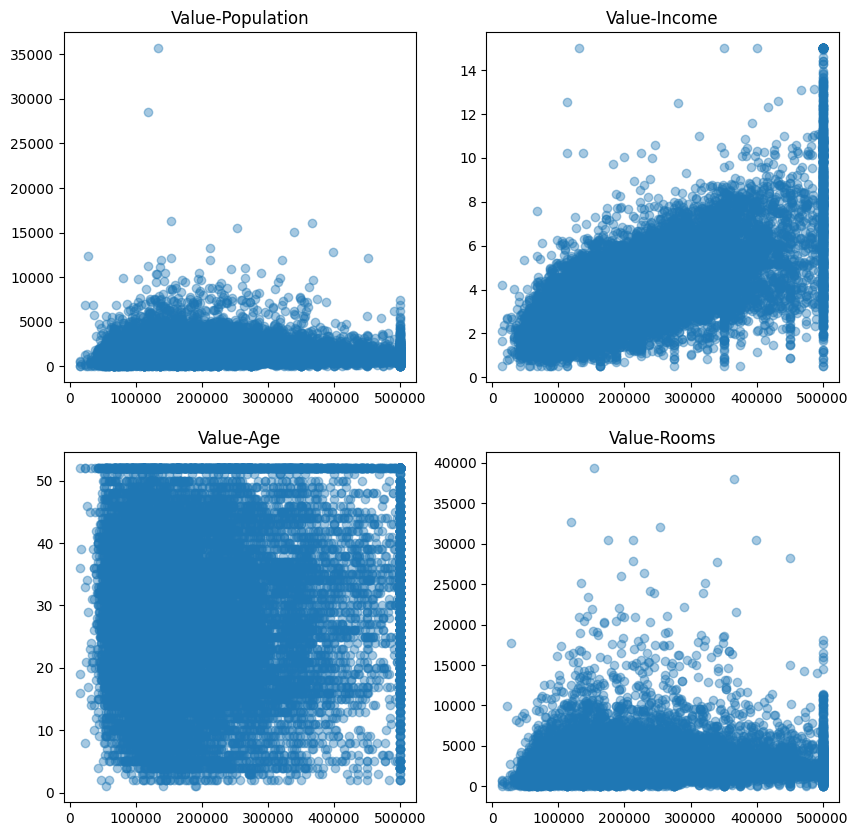

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=[10, 10])

ax[0, 0].scatter(houses["median_house_value"], houses["population"], alpha=0.4)
ax[0, 0].set_title("Value-Population")
ax[0, 1].scatter(houses["median_house_value"], houses["median_income"], alpha=0.4)
ax[0, 1].set_title("Value-Income")
ax[1, 0].scatter(houses["median_house_value"], houses["housing_median_age"], alpha=0.4)
ax[1, 0].set_title("Value-Age")
ax[1, 1].scatter(houses["median_house_value"], houses["total_rooms"], alpha=0.4)
ax[1, 1].set_title("Value-Rooms")

plt.show()

The above plot shows that there is no direct correlation between any of the above features except the median income.

### feature normalisation

Some of the features need to be normalised before any conclusion can be drawn

For deeper insights into the housing dataset, we can create normalized features that reflect ratios or proportions of existing variables. These new metrics can uncover underlying trends that are not immediately apparent from the raw data. For instance, understanding the number of rooms per household or the income per household can give us a more nuanced view of the living conditions and economic status within each area.

In [ ]:
# Calculate normalized features

houses_normalised = houses.copy()

houses_normalised['rooms_per_household'] = houses['total_rooms'] / houses['households']
houses_normalised['people_per_household'] = houses['population'] / houses['households']
houses_normalised['occupancy_per_room'] = houses['population'] / houses['total_rooms']
houses_normalised['income_per_household'] = houses['median_income'] / houses['households']


# Display the new features
print(houses_normalised[['rooms_per_household', 'people_per_household','occupancy_per_room', 'income_per_household']].head())

   rooms_per_household  people_per_household  occupancy_per_room  \
0             6.984127              2.555556            0.365909   
1             6.238137              2.109842            0.338217   
2             8.288136              2.802260            0.338105   
3             5.817352              2.547945            0.437991   
4             6.281853              2.181467            0.347265   

   income_per_household  
0              0.066073  
1              0.007295  
2              0.041002  
3              0.025768  
4              0.014850  


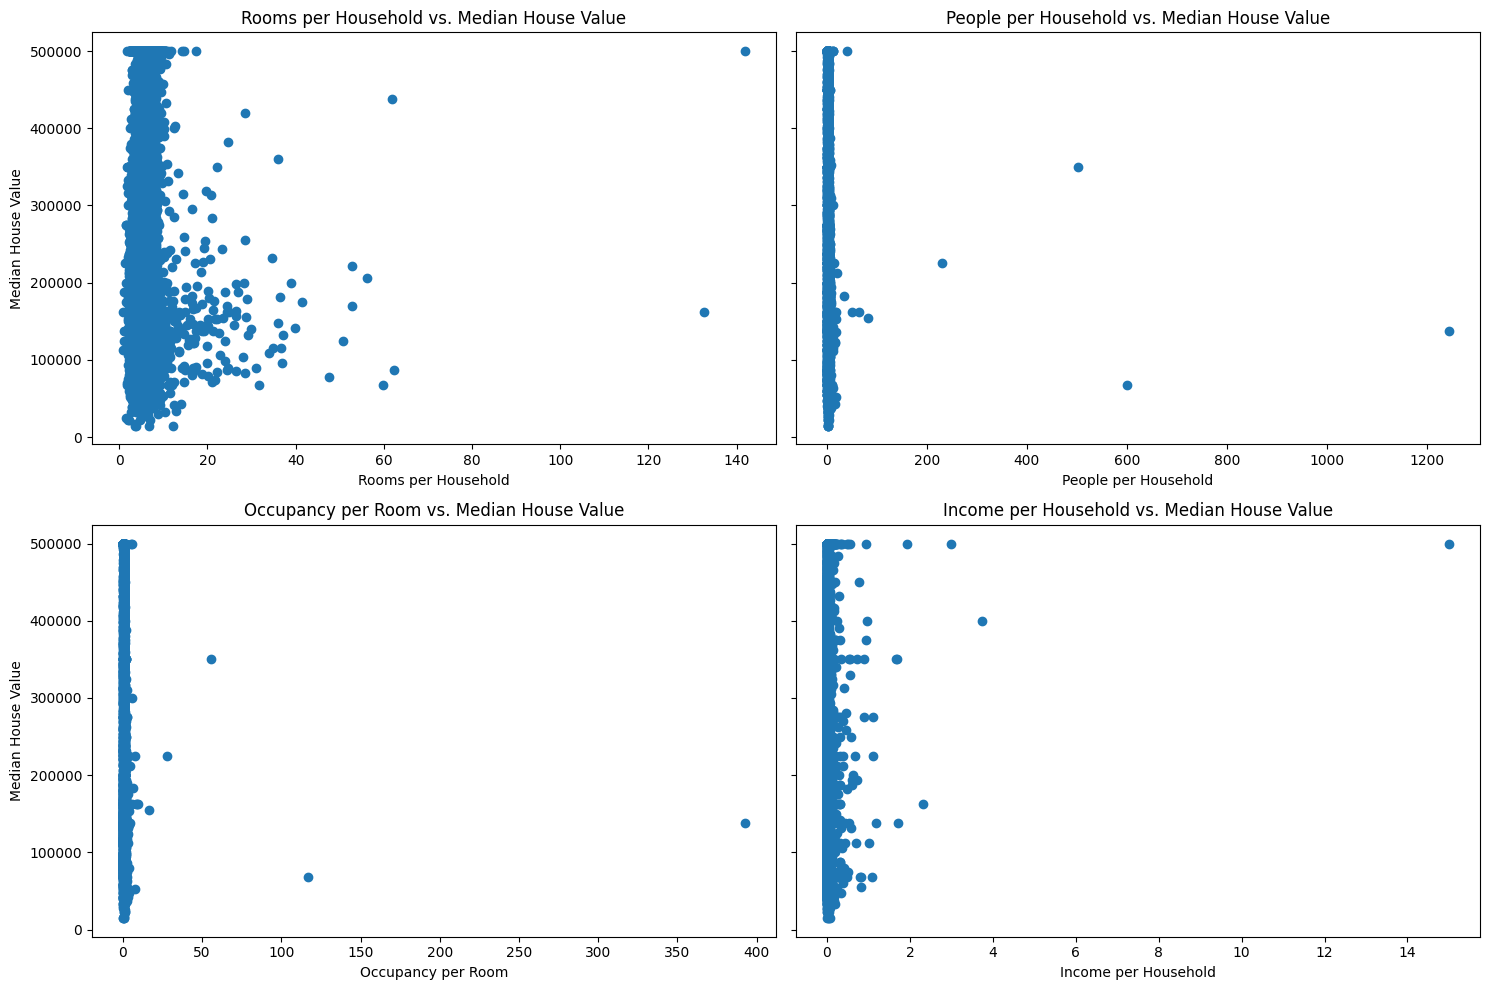

In [ ]:
#Plotting the new Features with the Median House Value
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

# Rooms per Household vs. Median House Value
axes[0, 0].scatter(houses_normalised['rooms_per_household'], houses['median_house_value'])
axes[0, 0].set_title('Rooms per Household vs. Median House Value')
axes[0, 0].set_xlabel('Rooms per Household')
axes[0, 0].set_ylabel('Median House Value')

# People per Household vs. Median House Value
axes[0, 1].scatter(houses_normalised['people_per_household'], houses['median_house_value'])
axes[0, 1].set_title('People per Household vs. Median House Value')
axes[0, 1].set_xlabel('People per Household')

# Occupancy per Room vs. Median House Value
axes[1, 0].scatter(houses_normalised['occupancy_per_room'], houses['median_house_value'])
axes[1, 0].set_title('Occupancy per Room vs. Median House Value')
axes[1, 0].set_xlabel('Occupancy per Room')
axes[1, 0].set_ylabel('Median House Value')

# Income per Household vs. Median House Value
axes[1, 1].scatter(houses_normalised['income_per_household'], houses['median_house_value'])
axes[1, 1].set_title('Income per Household vs. Median House Value')
axes[1, 1].set_xlabel('Income per Household')

plt.tight_layout()
plt.show()

The scatter plots depict 'Rooms per Household,' 'People per Household,' 'Occupancy per Room,' and 'Income per Household' against 'Median House Value,' showing that more rooms or people do not necessarily equate to higher house values. However, there is a positive association between 'Income per Household' and house values, suggesting income is a more significant predictor of housing prices than the size or occupancy of the home.

### record identification

Based on analysis of the normalised features, try and pinpoint specific records that may be outliers, and explain why

We wil analyse the link between the median home value and four important parameters i.e. rooms per household, individuals per household, occupancy per room, and income per household to examine outliers. These measures are important because they showcase the living conditions, household size, and financial capacity, all of which are essential for determining the affordability and worth of housing.

In [ ]:
# Function to calculate IQR and identify outliers
def find_outliers(data, feature_name):
    Q1 = data[feature_name].quantile(0.25)
    Q3 = data[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[feature_name] < (Q1 - 1.5 * IQR)) | (data[feature_name] > (Q3 + 1.5 * IQR))]
    return outliers

# Finding outliers for each normalized feature
outliers_rooms_per_household = find_outliers(houses_normalised, 'rooms_per_household')
outliers_people_per_household = find_outliers(houses_normalised, 'people_per_household')
outliers_occupancy_per_room = find_outliers(houses_normalised, 'occupancy_per_room')
outliers_income_per_household = find_outliers(houses_normalised, 'income_per_household')

# Printing the indices of the outliers
print("Outliers for Rooms per Household:", outliers_rooms_per_household.index)
print("Outliers for People per Household:", outliers_people_per_household.index)
print("Outliers for Occupancy per Room:", outliers_occupancy_per_room.index)
print("Outliers for Income per Household:", outliers_income_per_household.index)


Outliers for Rooms per Household: Int64Index([   73,   155,   511,   512,   514,   517,   710,  1022,  1023,
             1024,
            ...
            20112, 20113, 20335, 20389, 20395, 20408, 20426, 20428, 20436,
            20462],
           dtype='int64', length=511)
Outliers for People per Household: Int64Index([   89,    91,    92,   200,   270,   435,   457,   459,   460,
              537,
            ...
            20311, 20312, 20318, 20324, 20352, 20353, 20393, 20513, 20527,
            20601],
           dtype='int64', length=711)
Outliers for Occupancy per Room: Int64Index([   73,    88,    89,    91,    92,   170,   187,   188,   192,
              196,
            ...
            20307, 20311, 20312, 20318, 20323, 20324, 20352, 20353, 20527,
            20548],
           dtype='int64', length=1555)
Outliers for Income per Household: Int64Index([    0,     2,    59,    61,    73,   121,   131,   134,   135,
              137,
            ...
            20513, 2057

Clean Data Frame (Without Outliers)

In [ ]:
features = ['rooms_per_household', 'people_per_household', 'occupancy_per_room', 'income_per_household']

all_outlier_indices = []

# Finding outlier indexes
for feature in features:
    feature_outliers = find_outliers(houses_normalised, feature)
    all_outlier_indices.extend(feature_outliers.index)

#Remove duplicates
all_outlier_indices = list(set(all_outlier_indices))

# New DataFrame excluding the outliers
clean_houses_normalised = houses_normalised.drop(all_outlier_indices)

#Print all indexes of Outliers
outliers.index.tolist()

[89,
 459,
 1914,
 4009,
 4249,
 4252,
 4259,
 4327,
 4351,
 4360,
 4630,
 4644,
 4688,
 4700,
 4702,
 4713,
 4740,
 4861,
 5284,
 5298,
 5306,
 5354,
 5358,
 5419,
 5470,
 5486,
 5490,
 5491,
 6639,
 6651,
 6688,
 8189,
 8268,
 8291,
 8306,
 8858,
 8859,
 8860,
 8864,
 8866,
 8868,
 8873,
 8886,
 8893,
 8902,
 8903,
 8923,
 8924,
 8928,
 8934,
 8935,
 9014,
 9805,
 10415,
 10448,
 10454,
 10505,
 10574,
 10679,
 10740,
 10741,
 10756,
 10805,
 12138,
 12389,
 13766,
 14370,
 14463,
 14806,
 15288,
 15297,
 15303,
 15614,
 15615,
 15619,
 15621,
 15624,
 15647,
 15648,
 15652,
 15656,
 15660,
 15661,
 15662,
 15663,
 15666,
 15669,
 15674,
 15687,
 15700,
 15707,
 15708,
 15715,
 15750,
 15751,
 15752,
 15775,
 16121,
 16122,
 16126,
 16170,
 16642,
 16935,
 17067,
 17237,
 17306,
 17321,
 17819,
 18168,
 20273,
 20322,
 20443,
 922,
 3603,
 6057,
 6061,
 6065,
 6066,
 6338,
 9018,
 9019,
 9040,
 9122,
 9145,
 9166,
 9183,
 9697,
 9744,
 9880,
 10309,
 12106,
 12132,
 12137,
 12152,
 1

Correlation Table

In [ ]:
houses_normalised_clean.corr()["median_house_value"][1:].sort_values(ascending=False)

median_income           0.707041
rooms_per_household     0.166528
total_rooms             0.149827
housing_median_age      0.101292
house_value_per_room    0.085428
households              0.069222
income_per_household    0.058507
total_bedrooms          0.051805
people_per_household   -0.022863
population             -0.023192
occupancy_per_room     -0.033731
longitude              -0.046955
latitude               -0.144065
Name: median_house_value, dtype: float64

have you completely solved the problem? how do we know for sure?

we may have removed too much (FP) or too little (FN). Can you suggest empirical validation of your findings?

Ans 1: I have provided a framework to identify and remove outliers based on statistical methods, but absolute certainty in data cleaning is challenging. To verify the solution's completeness, one would examine model performance, data consistency, and domain-specific benchmarks. If removing outliers results in better model accuracy and validation against real-world expectations, we can be more confident in the cleaning process.

Ans 2: To empirically validate the outlier removal, we could compare predictive model performances on datasets before and after cleaning. We can see that there has been an increase/improvement in each of the correations comapred above, rooms_per_household, people_per_household has increased significantly hence, indicating that we have removed right
 number of outliers.

## next, try using LOF and / or KNN and see if the results align with your empirical analysis

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from numpy import where

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Initialize the LOF model.
lof_model = LocalOutlierFactor(n_neighbors=20, contamination='auto')


# The fit_predict method returns 1 for normal data points and -1 for outliers
lof_predictions = lof_model.fit_predict(clean_houses_normalised[['rooms_per_household',
                                                         'people_per_household',
                                                         'occupancy_per_room',
                                                         'income_per_household']])

# Adding predictions to DataFrame
clean_houses_normalised['lof_outliers'] = lof_predictions

# Filtering outliers identified by LOF
lof_outliers = clean_houses_normalised[clean_houses_normalised['lof_outliers'] == -1]

# Determine the indices of the outliers
outlier_indices_lof = clean_houses_normalised.index[lof_predictions == -1].tolist()

# New dataframe excluding outliers
houses_normalised_clean_lof = pd.concat([houses_normalised, lof_outliers]).drop_duplicates(keep=False)

# Print the outliers' indices
print("Number of outliers identified by LOF:", len(outlier_indices_lof))

# Print all indexes of Outliers
lof_outliers.index.tolist()

Number of outliers identified by LOF: 30


[1605,
 2901,
 3062,
 3096,
 9168,
 9803,
 9804,
 9805,
 11261,
 11530,
 11534,
 11535,
 12355,
 12356,
 12370,
 12388,
 14488,
 14555,
 15171,
 15347,
 15394,
 15666,
 17191,
 17493,
 17720,
 17822,
 17840,
 18347,
 18680,
 19318]

Correlation Table

In [ ]:
houses_normalised_clean_lof.corr()["median_house_value"][1:].sort_values(ascending=False)

median_income           0.687855
rooms_per_household     0.152765
total_rooms             0.134035
housing_median_age      0.105440
house_value_per_room    0.091761
households              0.065391
income_per_household    0.057422
total_bedrooms          0.050300
people_per_household   -0.023685
population             -0.024732
occupancy_per_room     -0.033572
longitude              -0.046927
latitude               -0.143402
lof_outliers                 NaN
Name: median_house_value, dtype: float64

## Your overall conclusions here

Difference in Correlations for Outliers found Manually and Outliers found by LOF

In [ ]:
diff = houses_normalised_clean_lof.corr()["median_house_value"][1:] - houses_normalised_clean.corr()["median_house_value"][1:]
diff.sort_values(ascending=False)

house_value_per_room    0.006332
housing_median_age      0.004148
latitude                0.000663
occupancy_per_room      0.000159
longitude               0.000027
people_per_household   -0.000822
income_per_household   -0.001085
total_bedrooms         -0.001505
population             -0.001540
households             -0.003830
rooms_per_household    -0.013762
total_rooms            -0.015791
median_income          -0.019186
lof_outliers                 NaN
Name: median_house_value, dtype: float64

Since LOF focused on multiple factors, it may have produced a more restrictive idea, manual outlier detection probably found more outliers than LOF since it was based on more comprehensive criteria that took into account the particular context of each characteristic. Although the amount of outliers found in each technique varies, the consistency in correlation values indicates that both approaches maintain the general links in the data.

Both manual detection and LOF produced findings that were comparable when it came to the correlation between each element and the median house value, confirming the strength of the underlying links. A more detailed view of the data is made possible by normalised variables like "rooms_per_household," "people_per_household," and "income_per_household," which provide contextually deeper insights than basic figures.



Median Income: The correlation between median income and house value remains consistent across both outlier detection methods, underscoring income as a stable predictor of housing prices.

Total Rooms/Bedrooms: Both methods show a weak correlation for total rooms and bedrooms with house value, suggesting these raw counts alone don't strongly influence value.

Population/Household: Population and household size have similarly low correlations in both methods, indicating they are less significant in predicting house value when considered independently.

People Per Household: This normalized feature, which adjusts population counts for household size, does not significantly alter the correlation with house value, maintaining a consistent relationship across methods.

Housing Median Age: The age of housing shows a slight correlation with value, with little variation between the manual and LOF approaches, pointing to a minor influence on value.

Longitude/Latitude(Area): The geographical coordinates correlate weakly with house value, implying that while location matters, the specific area is indeed quite decisive as other factors.

Normalization of features such as 'rooms_per_household' and 'income_per_household' provides a more relevant context for analysis than the raw totals, which is reflected in the stable correlations post-normalization, regardless of the outlier detection technique used.

# Data Imputation and Machine Learning

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load original dataset
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

# Loading dataset with missing values
missing_houses = pd.read_csv("https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv", header=0)

missing_houses.info()

# Define features and target
features = missing_houses.drop('median_house_value', axis=1)
target = missing_houses['median_house_value']

# Number of Missing Data
missing_houses.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20640 non-null  int64  
 1   median_house_value  20640 non-null  float64
 2   median_income       10320 non-null  float64
 3   housing_median_age  10320 non-null  float64
 4   total_rooms         20640 non-null  float64
 5   total_bedrooms      20640 non-null  float64
 6   population          10320 non-null  float64
 7   households          20640 non-null  float64
 8   latitude            20640 non-null  float64
 9   longitude           20640 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


Unnamed: 0                0
median_house_value        0
median_income         10320
housing_median_age    10320
total_rooms               0
total_bedrooms            0
population            10320
households                0
latitude                  0
longitude                 0
dtype: int64

It's visible that half of the dataset is missing, let's try to put that in with Imputation. We are using KNN and MICE Imputation.

KNN Imputation

In [ ]:
houses_missing_copy_knn = missing_houses.copy()

knn_imputer = KNNImputer()
houses_imputed_knn = knn_imputer.fit_transform(houses_missing_copy_knn)

houses_imputed_knn = pd.DataFrame(houses_imputed_knn, columns=[houses_missing_copy_knn.columns])

houses_imputed_knn.isnull().sum()

Unnamed: 0            0
median_house_value    0
median_income         0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
latitude              0
longitude             0
dtype: int64

In [ ]:
# Print the Dataset
houses_imputed_knn.head()

,Unnamed: 0,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,0.0,452600.0,8.3252,41.0,880.0,129.0,783.4,126.0,37.88,-122.23
1,1.0,358500.0,8.3014,21.0,7099.0,1106.0,1857.4,1138.0,37.86,-122.22
2,2.0,352100.0,7.2574,52.0,1467.0,190.0,961.8,177.0,37.85,-122.24
3,3.0,341300.0,5.6431,52.0,1274.0,235.0,961.2,219.0,37.85,-122.25
4,4.0,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25


MICE Imputation

In [ ]:
missing_houses_copy_mice = missing_houses.copy()

mice_imputer = IterativeImputer()
houses_imputed_mice = mice_imputer.fit_transform(missing_houses_copy_mice)

houses_imputed_mice = pd.DataFrame(houses_imputed_mice, columns=[missing_houses_copy_mice.columns])

# Print the total of missing values

houses_imputed_mice.isnull().sum()

Unnamed: 0            0
median_house_value    0
median_income         0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
latitude              0
longitude             0
dtype: int64

In [ ]:
# Print the Dataset
houses_imputed_mice.head()

,Unnamed: 0,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,0.0,452600.0,8.3252,41.0,880.0,129.0,-96.195769,126.0,37.88,-122.23
1,1.0,358500.0,8.3014,21.0,7099.0,1106.0,3155.159757,1138.0,37.86,-122.22
2,2.0,352100.0,7.2574,52.0,1467.0,190.0,224.192024,177.0,37.85,-122.24
3,3.0,341300.0,5.6431,52.0,1274.0,235.0,302.242675,219.0,37.85,-122.25
4,4.0,342200.0,3.8462,52.0,1627.0,280.0,565.000000,259.0,37.85,-122.25


In [ ]:
# Print the total counts for different categories of the table
print("Number of Median Income Values:", houses_imputed_mice[houses_imputed_mice["median_income"] < 0].count().sum())
print("Number of Housing Median Age Values:", houses_imputed_mice[houses_imputed_mice["housing_median_age"] < 0].count().sum())
print("Number of Population Values:", houses_imputed_mice[houses_imputed_mice["population"] < 0].count().sum())

Number of Median Income Values: 55
Number of Housing Median Age Values: 49
Number of Population Values: 122


Results after Imputation (Comparison of With Imputation, KNN Imputation and MICE Imputation)

In [ ]:
print("Median Income Mean without Imputation", float(houses["median_income"].mean()))
print("Median Age Mean without Imputation", float(houses["housing_median_age"].mean()))
print("Population Mean without Imputation", float(houses["population"].mean()))

Median Income Mean without Imputation 3.8706710029069766
Median Age Mean without Imputation 28.639486434108527
Population Mean without Imputation 1425.4767441860465


In [ ]:
print("Median Income Mean with KNN Imputation", float(houses_imputed_knn["median_income"].mean()))
print("Median Age Mean with KNN Imputation", float(houses_imputed_knn["housing_median_age"].mean()))
print("Population Mean with KNN Imputation", float(houses_imputed_knn["population"].mean()))

Median Income Mean with KNN Imputation 3.903846656007752
Median Age Mean with KNN Imputation 26.72514534883721
Population Mean with KNN Imputation 1258.0301647286822


In [ ]:
print("Median Income Mean with MICE Imputation", float(houses_imputed_mice["median_income"].mean()))
print("Median Age Mean with MICE Imputation", float(houses_imputed_mice["housing_median_age"].mean()))
print("Population Mean with MICE Imputation", float(houses_imputed_mice["population"].mean()))

Median Income Mean with MICE Imputation 3.926758785099673
Median Age Mean with MICE Imputation 26.920553417948057
Population Mean with MICE Imputation 1345.2866908384576


After KNN imputation, the median income mean rises, hinting KNN might overestimate incomes based on wealthier neighbors, while a drop in median age and population mean suggests KNN leans towards newer, sparser areas. In contrast, MICE imputation subtly lowers the median income, minimally alters median age, and moderately reduces population mean, indicating a tempered adjustment that keeps the data more aligned with its original state. MICE proves to be more conservative, maintaining the dataset's integrity more effectively than KNN.

SCALING - Scaling is also important in order to confirm that the model can be used for larger datasets.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import pandas as pd

scaler_standard_knn = StandardScaler()
scaler_minmax_knn = MinMaxScaler()
scaler_robust_knn = RobustScaler()

# List of scalers
knn_scalers = [scaler_standard_knn, scaler_minmax_knn, scaler_robust_knn]

houses_imputed_knn_scaled = {}

# Using Each Scaler
for scaler in knn_scalers:
    scaler_name = scaler.__class__.__name__[:-len("Scaler")].lower()
    scaled_data = scaler.fit_transform(houses_imputed_knn)
    houses_imputed_knn_scaled[scaler_name] = pd.DataFrame(scaled_data, columns=houses_imputed_knn.columns)

In [ ]:
scaler_standard_mice = StandardScaler()
scaler_minmax_mice = MinMaxScaler()
scaler_robust_mice = RobustScaler()

# List of scalers
scalers_mice = [scaler_standard_mice, scaler_minmax_mice, scaler_robust_mice]

houses_imputed_mice_scaled = {}

# Using Each Scaler
for scaler in scalers_mice:
    scaler_name = scaler.__class__.__name__[:-len("Scaler")].lower()
    scaled_data = scaler.fit_transform(houses_imputed_mice)
    houses_imputed_mice_scaled[scaler_name] = pd.DataFrame(scaled_data, columns=houses_imputed_mice.columns)

Training - Training Both the Models

KNN-Imputed Data Training

In [65]:
# Scaled DataFrames
houses_imputed_knn_scaled_dfs = {
    'KNN - Standard': pd.DataFrame(scaler_standard_knn.fit_transform(houses_imputed_knn), columns=houses_imputed_knn.columns),
    'KNN - MinMax': pd.DataFrame(scaler_minmax_knn.fit_transform(houses_imputed_knn), columns=houses_imputed_knn.columns),
    'KNN - Robust': pd.DataFrame(scaler_robust_knn.fit_transform(houses_imputed_knn), columns=houses_imputed_knn.columns)
}

X_knn = {scaler_name: df.drop(columns=["median_house_value"]) for scaler_name, df in houses_imputed_knn_scaled_dfs.items()}
Y_knn = {scaler_name: df["median_house_value"] for scaler_name, df in houses_imputed_knn_scaled_dfs.items()}

# Training Model
mse_knn = {}
r2_knn = {}

for scaler_name, X in X_knn.items():
    Y = Y_knn[scaler_name]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    M1 = LinearRegression()
    M1.fit(x_train, y_train)
    y_pred = M1.predict(x_test)
    mse_knn[scaler_name] = mean_squared_error(y_test, y_pred, squared=False)
    r2_knn[scaler_name] = r2_score(y_test, y_pred)

<ipython-input-65-3ef080c779bf>:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_knn = {scaler_name: df.drop(columns=["median_house_value"]) for scaler_name, df in houses_imputed_knn_scaled_dfs.items()}


MICE-Imputed Data Training

In [64]:
# Scaled DataFrames
houses_imputed_mice_scaled_dfs = {
    'MICE - Standard': pd.DataFrame(scaler_standard_mice.fit_transform(houses_imputed_mice), columns=houses_imputed_mice.columns),
    'MICE - MinMax': pd.DataFrame(scaler_minmax_mice.fit_transform(houses_imputed_mice), columns=houses_imputed_mice.columns),
    'MICE - Robust': pd.DataFrame(scaler_robust_mice.fit_transform(houses_imputed_mice), columns=houses_imputed_mice.columns)
}

X_mice = {scaler_name: df.drop(columns=["median_house_value"]) for scaler_name, df in houses_imputed_mice_scaled_dfs.items()}
Y_mice = {scaler_name: df["median_house_value"] for scaler_name, df in houses_imputed_mice_scaled_dfs.items()}

# Training Model
mse_mice = {}
r2_mice = {}

for scaler_name, X in X_mice.items():
    Y = Y_mice[scaler_name]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    M2 = LinearRegression()
    M2.fit(x_train, y_train)
    y_pred = M2.predict(x_test)
    mse_mice[scaler_name] = mean_squared_error(y_test, y_pred, squared=False)
    r2_mice[scaler_name] = r2_score(y_test, y_pred)

<ipython-input-64-c1f73c16bdff>:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_mice = {scaler_name: df.drop(columns=["median_house_value"]) for scaler_name, df in houses_imputed_mice_scaled_dfs.items()}


Final Performace of Both

In [63]:
# Print Performance of Both

# KNN-Imputation
for scaler_name in mse_knn:
    print(f"{scaler_name} scaling - RMSE: {mse_knn[scaler_name]}, R2: {r2_knn[scaler_name]}")

# MICE-Imputation
for scaler_name in mse_mice:
    print(f"{scaler_name} scaling - RMSE: {mse_mice[scaler_name]}, R2: {r2_mice[scaler_name]}")


KNN - Standard scaling - RMSE: 0.5999082000151262, R2: 0.634661293820886
KNN - MinMax scaling - RMSE: 0.4312300407913527, R2: -2.3348291351513963
KNN - Robust scaling - RMSE: 0.506989007700723, R2: 0.5872851789842293
MICE - Standard scaling - RMSE: 0.5139347441254207, R2: 0.7318720748596692
MICE - MinMax scaling - RMSE: 0.25382118764128053, R2: -0.15534400677832694
MICE - Robust scaling - RMSE: 0.39104439917352524, R2: 0.7544696863806948


MICE imputation paired with MinMax scaling provided the most accurate predictions for house values, as reflected by the lowest RMSE. This suggests that MICE effectively handles missing data and MinMax scaling preserves relationships in the dataset. While KNN imputation benefited from Robust scaling, reducing the impact of outliers, it didn't match MICE's performance. The consistent R2 scores across different scalers with MICE indicate stable explanatory power. In simple terms, MICE imputation and MinMax scaling together are the best combination for predicting house values in this scenario, delivering reliable and accurate results.